# Introduction

<p align="justify">Welcome! In this case we'll be exploring how to use advanced analytic and machine learning techniques to predict strokes. 
<br>
<br>
<details>
<summary>Some of the skills you'll explore are (Click to Expand):</summary>
<ul>
    <li>R Programming</li>
    <li>Data Cleaning</li>
    <li>Exploratory Data Analysis</li>
    <li>Data Visualization</li>
    <li>Leveraging Domain Knowledge</li>
    <li>Machine Learning</li>
    <li>Random Forest Algorithm</li>
</details><br>
Don't worry if you're unsure what some of these terms are. They'll be explained throughout the case. Let's begin! 

<img src="https://www.fromthegenesis.com/wp-content/uploads/2018/06/RanFore.jpg" style="float: left; width: 34%; margin-bottom: 0.5em;">
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSxzj-rl3NFqS8Iow-h_3cE2mJoINBs9ZFOjo-tx44d86KiRja7" style="float: left; width: 33%; margin-left: 1%; margin-bottom: 0.5em;">
<img src="https://www.edvancer.in/wp-content/uploads/2015/10/f5bd5f87059fce20564f6e5eb562022e.png" style="float: left; width: 27%; margin-left: 1%; margin-bottom: 0.5em;">

## Case Scenario

Imagine you're an emergency physician at a local community hospital. Your hospital has recently joined a regional initiative to improve quality of care for stroke. After undergoing over a decade of training, you're well-versed in the clinical manifestations of stroke. Still, you know there is great uncertainty in diagnosing and treating stroke. The window for treatment is narrow and the drugs involved can have dangerous side-effects. Can analytics and machine learning help with this uncertainty?

Continue the case to find out

### Clinical Background: Stroke

Stroke is an acute neurologic condition referred to as a cerebrovascular event. This means stroke is a condition that affects the brain ("cerebro-") and involves blood vessels ("vascular). In stroke, arteries leading to and within the brain are either blocked by a clot or rupture. The end result is lack of oxygen and nutrients to the brain leading to brain damage. 

<center>
  <img width="500" height=300 src="https://www.strokeinfo.org/wp-content/uploads/2019/06/HTN_16_pg39_art600x400.png">
<\center>

Stroke is usually diagnosed clinically (by symptoms) and imaging (non-contrast head CT scan). Stroke can exhibit a wide range of symptoms depending on the location affected within the brain. Some nonspecific symptoms include headache ("worst headache of my life", nausea, vomiting, loss of consciousness, and neck stiffness. If suspected a non-contrast head CT is ordered to detect bleeding. Depending on whether the stroke is caused by a clot or rupture, treatment will be different. A clot will be treated with blood thinners. A rupture will be treated through emergent neurosurgery. 

> Stroke require prompt diagnosis and treatment before irreversible damages sets in. Any tool (such as a predictive model) that could make stroke diagnosis quicker or easier could make a large difference in preventing stroke. 

## Using Jupyter Notebook 

To run any of the code, select the code cell on the **bottom right (1.2)**, and click the `Run` button on the toolbar above. Try it out on the example code cell below on the **bottom right (1.2)**.

**The** `Run` **Button**
<img src="https://i.imgur.com/jr4dpLW.png" style="width:300px;height:150px;">

In [1]:
# This is an example of a code cell
cat('Congratulations! \n')
cat('You\'ve run your first code cell.\n')


NameError: name 'cat' is not defined

### Jupyter Notebook Background

What is a Jupyter Notebook? Why is it so special? Below is a definition of Jupyter Notebook from the creators. 

> "The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more." - [jupyter.org](https://www.jupyter.org)

Through integrating code, text, and multimedia, jupyter notebooks allow us to create a digital notebook that is both **interactive** and **informative**. Don't just take my word for it though, personally explore how Jupyter Notebook can augment your learning through the case!

<img src="https://www.dataquest.io/wp-content/uploads/2019/01/1-LPnY8nOLg4S6_TG0DEXwsg-1.png" style="width:600px;height:300px;">


### Case Code Tips

Within code cells you will see green text preceded by a `#` symbol. These are comments and will help explain what portions of the code are doing. All code should be ready to run as shown. 

Some code may require more time to run. On the left hand side you will notice the label: `In [ ]:`. If there is an `*` in between the `[]`'s after you select `Run`, that indicates that your code is in the process of running. Like so: `In [*]:`

## Meeting Our Data

We'll be using a deidentified set of patient data made available on [kaggle](https://www.kaggle.com/asaumya/healthcare-dataset-stroke-data/version/1), a data science community website. The data was originally provided by Mckinsey Analytics for a online hackathon hosted by Analytics Vidhya.  


### Data File

<p style="text-align: center;">stroke_predict.csv</p>

***
This file contains our dataset. There are a little over 43,000 patients with 12 variables. The data includes general demographic and clinical variables. 

The dataset will already be downloaded for the case. The The original data can be acceded [here](https://www.kaggle.com/asaumya/healthcare-dataset-stroke-data/version/1). 

### Consulting the Data Dictionary

There are several variables or labels which you might not understand. There are many reasons for this. You might lack domain experience for the data you're analyzing. The data creators might also have used arbitrary labels only they understood (this is considered a bad practice).

The way to combat this is by consulting the data dictionary or documentation. These are tables or documents which describe the data in detail. Have a variable you don't understand? Check the documentation! Don't understand what an output for a variable means? Check the documentation!

A data dictionary is provided on the [kaggle page](https://www.kaggle.com/asaumya/healthcare-dataset-stroke-data/version/1#Screen%20Shot%202018-04-17%20at%2012.15.42%20AM.png) where the data is hosted. The data dictionary has also been reproduced below for your convenience.  

<center>

| *Variable*        | *Definition*                                           |
| ----------------- | ------------------------------------------------------ |
| id                | Patient ID                                             |
| gender            | Gender of Patient                                      |
| age               | Age of Patient                                         | 
| hypertension      | 0 - no hypertension, 1 - suffering from hypertension   |
| heart_disease     | 0 - no heart disease, 1 - suffering from heart disease |
| ever_married      | Yes/No                                                 |
| work_type         | Type of occupation                                     |
| Residence_type    | Area type of residence (Urban/ Rural                   |
| avg_glucose_level | Average Glucose level (measured after meal)            |
| bmi               | Body mass index                                        |
| smoking_status    | patient's smoking status                               |
| stroke            | patient's smoking status                               |

</center>

# Setup (Do Not Skip)

Run the code below to set up specific settings for our case. Do not skip this step!

In [109]:
# Calling external libraries for additional functionality
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"
from pandas.api.types import CategoricalDtype 
plt.style.use('fivethirtyeight')
# Increase max number of columns displayed in output tables
pd.set_option("display.max_columns",2000)

# Make sure your ML results are the same
random.seed(10)

print('Setup complete!')

Setup complete!


# Cleaning Our Data

The first step in any analytic project is to clean our data. This is a critical step that is commonly overlooked within data science projects. This is critical for making our data convenient to interpret and manipulate. In addition, many analytic techniques require properly formatted data. Finally, healthcare datasets may have have data that isn't clinically relevant (ie. raw lab values). Processing can convert these variables into clinically meaningful information. It won't matter how sophisticated our analysis is if we don't properly process our data. A common saying in data science is "Junk in, Junk out". 

## Reading Our data

We'll begin by reading in our data so we can clean and use it. 

In [3]:
# Note: Unicode Transformation Format – 8 (UTF-8) is a standard to encode characters in different languages
print('Data loading, please wait')
stroke_data = pd.read_csv("data/stroke_predict.csv",  encoding="UTF-8" ,sep=",")
print('Data loaded!')

Data loading, please wait
Data loaded!


Now let's get an overview of our data

In [4]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


We can see that many variables have not been coded into an easily human-readable format (ie. `hypertension`, `heart_disease`, `stroke`). We will also need to convert some of the clinical variables into meaningful categories (`avg_glucose_level` and `bmi`). 

## Recoding Variables

Our first task will be recoding the variables `hypertension` (high blood pressure), `heart_disease`, and `stroke` into something meaningful. Based upon the data dictionary, we can see that a value of `1` for any of these fields indicates the patient is suffering from this condition. A value of `0` indicates they are not. 

In [5]:
# Recoding
stroke_data.loc[stroke_data['hypertension']==1,'hypertension'] = 'History of hypertension'
stroke_data.loc[stroke_data['hypertension']==0,'hypertension'] = 'No hypertension'
stroke_data.loc[stroke_data['heart_disease']==1,'heart_disease'] = 'History of heart disease'
stroke_data.loc[stroke_data['heart_disease']==0,'heart_disease'] = 'No heart disease'
stroke_data.loc[stroke_data['stroke']==1,'stroke'] = 'History of stroke'
stroke_data.loc[stroke_data['stroke']==0,'stroke']='No stroke'

print('Data Recoded')
stroke_data[['hypertension','heart_disease','stroke']].head()

Data Recoded


,hypertension,heart_disease,stroke
0,No hypertension,No heart disease,No stroke
1,History of hypertension,No heart disease,No stroke
2,No hypertension,No heart disease,No stroke
3,No hypertension,No heart disease,No stroke
4,No hypertension,No heart disease,No stroke


Lets confirm our changes

In [6]:
stroke_data[['hypertension','heart_disease','stroke']].head()

,hypertension,heart_disease,stroke
0,No hypertension,No heart disease,No stroke
1,History of hypertension,No heart disease,No stroke
2,No hypertension,No heart disease,No stroke
3,No hypertension,No heart disease,No stroke
4,No hypertension,No heart disease,No stroke


Looks like our changes were successful. In the output, notice the `int`. This is R's way to tell us that R considers these a integer variable. For our purposes, we can consider integers as a subtype of numeric variables. 

We will be converting these into categorical variables since these variables have a limited number of categories

**Pre-Check:** What is the difference between a numeric and categorical variable?

- **Numeric:** variables whose values are whole numbers (ie. numbers, percents)
- **Categorical:** variables whose values are selected from a group (ie. dog breeds, male/female) 

> Note R calls categorical variables **Factors**

In [7]:
stroke_data.hypertension.astype('category')
stroke_data.heart_disease.astype('category')
stroke_data.stroke.astype('category')

print('Conversion complete!')

0                No hypertension
1        History of hypertension
2                No hypertension
3                No hypertension
4                No hypertension
5                No hypertension
6                No hypertension
7                No hypertension
8                No hypertension
9        History of hypertension
10               No hypertension
11               No hypertension
12               No hypertension
13               No hypertension
14               No hypertension
15               No hypertension
16               No hypertension
17               No hypertension
18               No hypertension
19               No hypertension
20       History of hypertension
21       History of hypertension
22               No hypertension
23               No hypertension
24               No hypertension
25               No hypertension
26               No hypertension
27               No hypertension
28               No hypertension
29               No hypertension
          

0                No heart disease
1                No heart disease
2                No heart disease
3                No heart disease
4                No heart disease
5                No heart disease
6                No heart disease
7        History of heart disease
8                No heart disease
9                No heart disease
10               No heart disease
11       History of heart disease
12               No heart disease
13               No heart disease
14               No heart disease
15               No heart disease
16               No heart disease
17               No heart disease
18               No heart disease
19       History of heart disease
20               No heart disease
21               No heart disease
22               No heart disease
23               No heart disease
24               No heart disease
25               No heart disease
26               No heart disease
27               No heart disease
28               No heart disease
29            

0        No stroke
1        No stroke
2        No stroke
3        No stroke
4        No stroke
5        No stroke
6        No stroke
7        No stroke
8        No stroke
9        No stroke
10       No stroke
11       No stroke
12       No stroke
13       No stroke
14       No stroke
15       No stroke
16       No stroke
17       No stroke
18       No stroke
19       No stroke
20       No stroke
21       No stroke
22       No stroke
23       No stroke
24       No stroke
25       No stroke
26       No stroke
27       No stroke
28       No stroke
29       No stroke
           ...    
43370    No stroke
43371    No stroke
43372    No stroke
43373    No stroke
43374    No stroke
43375    No stroke
43376    No stroke
43377    No stroke
43378    No stroke
43379    No stroke
43380    No stroke
43381    No stroke
43382    No stroke
43383    No stroke
43384    No stroke
43385    No stroke
43386    No stroke
43387    No stroke
43388    No stroke
43389    No stroke
43390    No stroke
43391    No 

Conversion complete!


### Checking for Missing Values

Let examine our data for missing values. 

In [8]:
print('Number of Missing Data for Each Variable:')
stroke_data.isnull().sum()

Number of Missing Data for Each Variable:


id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

Besides `bmi` our data looks exceptionally clean. This rarely happens. It is more likely that our data is not coded correctly. Lets examine our data more closely

In [9]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,No hypertension,No heart disease,No,children,Rural,95.12,18.0,NaN,No stroke
1,30468,Male,58.0,History of hypertension,No heart disease,Yes,Private,Urban,87.96,39.2,never smoked,No stroke
2,16523,Female,8.0,No hypertension,No heart disease,No,Private,Urban,110.89,17.6,NaN,No stroke
3,56543,Female,70.0,No hypertension,No heart disease,Yes,Private,Rural,69.04,35.9,formerly smoked,No stroke
4,46136,Male,14.0,No hypertension,No heart disease,No,Never_worked,Rural,161.28,19.1,NaN,No stroke


We can see that `smoking_status` has numerous NaN. Lets take a closer look at `smoking_status`. 

In [10]:
stroke_data.smoking_status.value_counts()
print('The number of missing values:' ,stroke_data.smoking_status.isnull().sum())
stroke_data.smoking_status.fillna('never smoked',inplace=True)

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

The number of missing values: 13292


### Checking for Implausible Values

Lets check our data for implausible values. Focus on the minimum and maximum values for the output below

In [11]:
# numerical variables
stroke_data.describe()

,id,age,avg_glucose_level,bmi
count,43400.000000,43400.000000,43400.000000,41938.000000
mean,36326.142350,42.217894,104.482750,28.605038
std,21072.134879,22.519649,43.111751,7.770020
min,1.000000,0.080000,55.000000,10.100000
25%,18038.500000,24.000000,77.540000,23.200000
50%,36351.500000,44.000000,91.580000,27.700000
75%,54514.250000,60.000000,112.070000,32.900000
max,72943.000000,82.000000,291.050000,97.600000


In [12]:
# categorical variables
stroke_data.gender.value_counts()
stroke_data.hypertension.value_counts()
stroke_data.heart_disease.value_counts()
stroke_data.work_type.value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

No hypertension            39339
History of hypertension     4061
Name: hypertension, dtype: int64

No heart disease            41338
History of heart disease     2062
Name: heart_disease, dtype: int64

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64

In [13]:
stroke_data.ever_married.value_counts()
stroke_data.Residence_type.value_counts()
stroke_data.smoking_status.value_counts()
stroke_data.stroke.value_counts()

Yes    27938
No     15462
Name: ever_married, dtype: int64

Urban    21756
Rural    21644
Name: Residence_type, dtype: int64

never smoked       29345
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

No stroke            42617
History of stroke      783
Name: stroke, dtype: int64

Among our variables, we can see that `bmi` has a maximum 97.60. It biologically unlikely for an individual to have a `bmi` of 97.60. Lets take a closer look. 

In [14]:
print('BMI:')
stroke_data.bmi.quantile((0, .01, .05, .10, .25, .50, .75, .90, .95, .99, 1))

BMI:


0.00    10.1
0.01    15.0
0.05    17.4
0.10    19.4
0.25    23.2
0.50    27.7
0.75    32.9
0.90    38.6
0.95    42.6
0.99    51.8
1.00    97.6
Name: bmi, dtype: float64

We can see that the the max `bmi` is a huge jump even compared to our 99th percentile. However, a `bmi` of 10.1, while underweight, is physiologically possible. Based on our finding, lets reclassify implausible values as `Na`

In [15]:
stroke_data.loc[stroke_data.bmi > 60, 'bmi'] = np.nan
print('Values Reclassified!')

Values Reclassified!


## Creating Clinically Relevant Variables

Our data includes two clinical measures: `avg_glucose_lvl` and `bmi`. As raw values, these variables are not optimal for providing clinical information. Adding context can help with this.

We will be taking these measures and creating clinically meaningful variables. 

### BMI

BMI stands for Body Mass Index. This a measure of body weight based upon a person's weight and height. This measure is commonly used to evaluate whether a person is overweight. Below is the BMI formula. 

\[\large \frac{weight (kg)}{[height (m)]^{2}}\]

We will create a new variable which reflects the clinical cutoffs for bmi. 

**Knowledge Check:** What are the clinical cut-offs for BMI?

<center>

| *Category*     | *BMI Range*     |
| -------------- | --------------- |
| Underweight    | BMI < 18.5      |
| Healthy Weight | 18.5 ≤ BMI < 25 |
| Overweight     | 25 ≤ BMI < 30   |
| Obese          | 30 ≥ BMI        |

</center>

Let create the new variable `bmi_interp` based off these cut-offs 

In [16]:
# Create 'bmi_interp'
stroke_data.dropna(subset=['bmi'],inplace=True)
stroke_data['bmi_interp'] = stroke_data.bmi.apply(lambda x: 'Underweight' if x < 18.5 
                                                  else ('Health Weight' if x>=18.5 and x<25 
                                                        else ('Overweight' if x>=25 and x<30 
                                                              else 'Obese' )) )


# Convert from character to categorical
# Make sure is ordered
stroke_data.bmi_interp=stroke_data.bmi_interp.astype(CategoricalDtype(categories=['Underweight', 'Health Weight',
                                                                    'Overweight', 'Obese'], ordered=True))

print('\'bmi_interp\' variable created!') 

'bmi_interp' variable created!


Let's confirm our results

In [17]:
stroke_data[['bmi','bmi_interp']].head()


,bmi,bmi_interp
0,18.0,Underweight
1,39.2,Obese
2,17.6,Underweight
3,35.9,Obese
4,19.1,Health Weight


#### Limitations and Considerations when using BMI

BMI is a simple, inexpensive, and common measure for body fat. However, there are several clinical considerations to keep in mind when using this measure. It's critical to keep in mind BMI is only a surrogate measure since it uses weight instead of actual body fat content in its calculations. Below are three examples of factors that can influence BMI:

- Age: older adults usually have more body fat than younger adults for the same BMI
- Gender: women tend to have greater amounts of body fat compared to men for the same BMI
- Muscle mass: muscular individuals or athletes may have higher BMI due to increased muscle mass

[Source](https://www.cdc.gov/obesity/downloads/bmiforpactitioners.pdf)

### Average Glucose Level

The data dictionary defines `avg_glucose_lvl` as the average glucose level measured after meals (glucose is another term for blood sugar levels). Glucose levels are commonly used to assess whether a patient has diabetes. A patient with diabetes will have on-average a higher blood glucose level.

However, `avg_glucose_lvl`, as defined by the data dictionary, is clinically problematic. 

**Food for Thought:** What's wrong with 'avg_glucose_lvl' as a measure of blood glucose levels? What is a better measure of average blood sugar status?

Individual's blood glucose can vary widely day to day. This is especially true after meals when individuals are experiencing a physiological spike in their glucose levels. 

[Here's a news article discussing inter-population variability in glucose measurements](https://www.medicalnewstoday.com/articles/322614.php)

A better measure would be hemoglobin A1C which measures the amount of sugar attached to each red blood cell. This is an indication of the average blood glucose status of a patient over 2 to 3 months. 

<img src="https://www.ekfdiagnostics.com/res/HbA1c-Hemoglobin-banner" style="text-align: center; width: 66%;">

We can't change the measurements used in the data. However, just because the glucose measurement is not ideal doesn't mean we need to disregard it completely. Every bit of data counts in analytics!

A good proxy for `avg_glucose_level` would be the cutoffs determined by the oral glucose tolerance test (OGTT)

**Knowledge Check:** What are the criteria for normal, prediabetic, and diabetic in the OGTT two hours after drinking??

<center>

| *Category*     | *Blood Glucose (mg/dl)*   |
| -------------- | ------------------------- |
| Diabetic       | 200 ≤ Blood Glucose       |
| Prediabetic    | 140 ≤ Blood Glucose < 200 |
| Healthy        |  Blood Glucose < 140      |

</center>

We will now use these criteria to classify a patient's 'avg_glucose_level' as either normal, prediabetic, or diabetic based upon OGTT criteria. 

In [18]:
# Create 'diabetic_interp'
stroke_data['diabetic_interp'] = stroke_data.avg_glucose_level.apply(lambda x: 'Healthy' if x < 140 
                                                  else ('Prediabetic' if x>=140 and x<200
                                                              else 'Diabetic')) 


# Convert from character to categorical
stroke_data.diabetic_interp=stroke_data.diabetic_interp.astype(CategoricalDtype(categories=['Healthy', 'Prediabetic',
                                                                    'Diabetic'], ordered=True))

print('\'diabetic_interp\' variable created!')

'diabetic_interp' variable created!


Let's confirm our changes

In [19]:
stroke_data[['avg_glucose_level','diabetic_interp']].head()

,avg_glucose_level,diabetic_interp
0,95.12,Healthy
1,87.96,Healthy
2,110.89,Healthy
3,69.04,Healthy
4,161.28,Prediabetic


# Exploratory Data Analysis 

Now that we've cleaned our data we can begin exploring our data. Using this, we can see which features are good candidates for building our prediction model. Feature selection  will determine how good or how bad your model is. Bad feature selection can have a hugely negative impact on your model even if you used the most advanced techniques. Understanding the clinical nuances of your data can inform better feature selection

### Why Can't We Just Use All or Most Variables?

One issue you might be wondering about is why do we even need to select variables. Why not just use all of the variables? After all, more data lead to better models right? This is a common misconception that even experienced analysts need to watch out for. Including too many features in your prediction model can lead to what is known as **overfitting**.

<img src="https://3gp10c1vpy442j63me73gy3s-wpengine.netdna-ssl.com/wp-content/uploads/2018/03/Screen-Shot-2018-03-22-at-11.22.15-AM-e1527613915658.png" align="center" style="width: 50%; margin-bottom: 0.5em; margin-top: 0.5em;">

 **Overfitting** is essentially where you build a model that adheres too closely to your current data set and is unable to predict observations that are not from your current data set. In other words, its where you develop a model that tuned too closely to your current data, and is not generalizable to outside data sources. A prediction model that is not generalizeable is not a useful model!

### Getting A Closer Look At Our Data

Lets take a closer look as we begin our exploratory data analysis. 

In [20]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_interp,diabetic_interp
0,30669,Male,3.0,No hypertension,No heart disease,No,children,Rural,95.12,18.0,never smoked,No stroke,Underweight,Healthy
1,30468,Male,58.0,History of hypertension,No heart disease,Yes,Private,Urban,87.96,39.2,never smoked,No stroke,Obese,Healthy
2,16523,Female,8.0,No hypertension,No heart disease,No,Private,Urban,110.89,17.6,never smoked,No stroke,Underweight,Healthy
3,56543,Female,70.0,No hypertension,No heart disease,Yes,Private,Rural,69.04,35.9,formerly smoked,No stroke,Obese,Healthy
4,46136,Male,14.0,No hypertension,No heart disease,No,Never_worked,Rural,161.28,19.1,never smoked,No stroke,Health Weight,Prediabetic


In [21]:
stroke_data.describe()

,id,age,avg_glucose_level,bmi
count,41849.000000,41849.000000,41849.000000,41849.000000
mean,36817.455351,41.834313,103.592759,28.524251
std,20914.258974,22.498269,42.181520,7.568271
min,1.000000,0.080000,55.000000,10.100000
25%,18779.000000,24.000000,77.360000,23.200000
50%,36988.000000,43.000000,91.320000,27.700000
75%,54867.000000,59.000000,111.450000,32.800000
max,72943.000000,82.000000,291.050000,60.000000


In [22]:
stroke_data.gender.value_counts()
stroke_data.hypertension.value_counts()
stroke_data.heart_disease.value_counts()
stroke_data.ever_married.value_counts()
stroke_data.work_type.value_counts()

Female    24887
Male      16955
Other         7
Name: gender, dtype: int64

No hypertension            38201
History of hypertension     3648
Name: hypertension, dtype: int64

No heart disease            40044
History of heart disease     1805
Name: heart_disease, dtype: int64

Yes    26716
No     15133
Name: ever_married, dtype: int64

Private          23921
Self-employed     6459
children          6059
Govt_job          5234
Never_worked       176
Name: work_type, dtype: int64

In [23]:
stroke_data.Residence_type.value_counts()
stroke_data.smoking_status.value_counts()
stroke_data.stroke.value_counts()
stroke_data.bmi_interp.value_counts()
stroke_data.diabetic_interp.value_counts()

Urban    20960
Rural    20889
Name: Residence_type, dtype: int64

never smoked       28555
formerly smoked     7085
smokes              6209
Name: smoking_status, dtype: int64

No stroke            41206
History of stroke      643
Name: stroke, dtype: int64

Obese            15926
Overweight       11694
Health Weight    11045
Underweight       3184
Name: bmi_interp, dtype: int64

Healthy        36122
Prediabetic     2885
Diabetic        2842
Name: diabetic_interp, dtype: int64

This summary page presents us with quite a bit of data. The first thing to realize is that the output will differ based on whether the variable is numeric or categorical. Numeric outputs will include summary statistics while categorical variables will include frequency counts of each category. 

These summaries will provide a useful reference throughout our exploratory data analysis. 

Missing data can bias the results of our analysis. For instance, say that the individuals that did not respond about smoking status refused to respond because they were embarrassed of their smoking habit. This might make smoking individuals more likely to be smokers compared to individuals that responded to the survey. 

In summary, missing data can be problematic, especially if the missing group is somehow different from the non-missing group. 

A chi-square test is a statistical test that tells you whether groups of observations are different. For instance, say you're researching two companies and you divide them either as male or female. The number of males compared to females in the two companies differ but how can you tell that this is not random chance? A chi-squared test can be used to differentiate whether the **observed** number of males and females in your study differs from the **expected** number of males and females. 

> Note: Chi-square tests can only be used for categorical variables. There are seperate tests to determine whether numerical numbers differ form one another. These additional tests are beyond the scope of the case. 

##  Assessing Numerical Variables

Lets take a look at our other variables

In [24]:
stroke_data.describe()

,id,age,avg_glucose_level,bmi
count,41849.000000,41849.000000,41849.000000,41849.000000
mean,36817.455351,41.834313,103.592759,28.524251
std,20914.258974,22.498269,42.181520,7.568271
min,1.000000,0.080000,55.000000,10.100000
25%,18779.000000,24.000000,77.360000,23.200000
50%,36988.000000,43.000000,91.320000,27.700000
75%,54867.000000,59.000000,111.450000,32.800000
max,72943.000000,82.000000,291.050000,60.000000


We can see that there are a couple numeric variables. However, the only one we would consider is age since the `bmi` and `avg_glucose_level` have newer and more clinically relevant variables available. 

We have some summary stats about age available. Lets take a look at the distribution. 

Text(45, 1500, 'Dashed Line Represents Median Age (44 Years)')

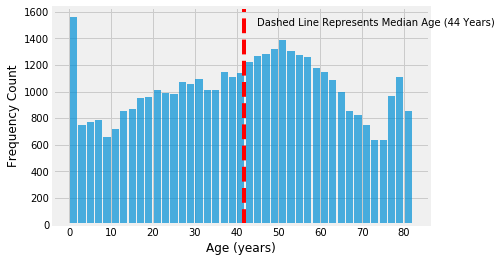

In [25]:
# Create Plot
n, bins, patches=plt.hist(stroke_data.age,bins='auto', alpha=0.7, rwidth=0.85)
xlabel=plt.xlabel('Age (years)')
ylabel=plt.ylabel('Frequency Count')
plt.axvline(stroke_data.age.mean(), color='r',linestyle='dashed')
plt.text(45,1500,'Dashed Line Represents Median Age (44 Years)')
plt.show()

There does not appear to be any extreme age values or prominent age clusters. Now lets see if theres a relationship between stroke status and age

/Users/IssacQI/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


The dots in the center of each violin plot represent median age of each group


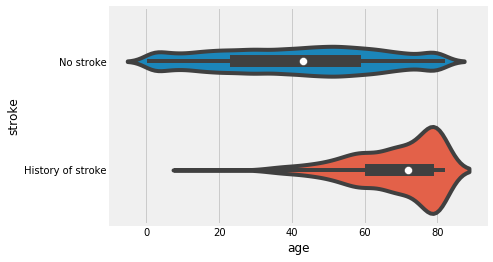

In [26]:
sns.violinplot(y=stroke_data.stroke,x=stroke_data.age)
print('The dots in the center of each violin plot represent median age of each group')

The results are pretty stark. Both median age and distribution of age drastically differs between the stroke and non-stroke group. This make sense since as individuals age, they are predisposed to cardiovascular events such as atherosclerosis or stroke. 

These results indicate age is an excellent candidate variable for our model since age seems to have a large effect on stroke status. This indicates our model could use age to differente between stroke and no stroke. 

## Assessing Categorical Variables

Finally lets look at our remaining variables.

The rest of the variable of interest are categorical. We should be able to observe their effect on stroke well and quickly using stacked bar plots. 

In [118]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_interp,diabetic_interp
0,30669,Male,3.0,No hypertension,No heart disease,No,children,Rural,95.12,18.0,never smoked,0,Underweight,Healthy
1,30468,Male,58.0,History of hypertension,No heart disease,Yes,Private,Urban,87.96,39.2,never smoked,0,Obese,Healthy
2,16523,Female,8.0,No hypertension,No heart disease,No,Private,Urban,110.89,17.6,never smoked,0,Underweight,Healthy
3,56543,Female,70.0,No hypertension,No heart disease,Yes,Private,Rural,69.04,35.9,formerly smoked,0,Obese,Healthy
4,46136,Male,14.0,No hypertension,No heart disease,No,Never_worked,Rural,161.28,19.1,never smoked,0,Health Weight,Prediabetic


there's no case for at least one category 


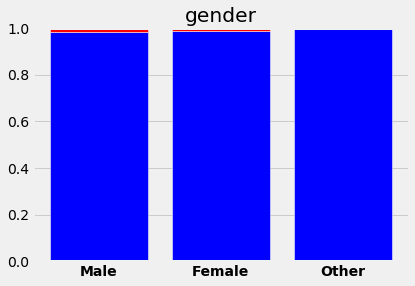

In [278]:
def stacked_plot(feature):
    binary=stroke_data.groupby('stroke')
    length=len(stroke_data[feature].unique())
    layers=[]
    for symbol, group in binary:
        sequence=group[feature].value_counts().index
        temp=[]
        try:
            for i in range(length):
                number=group[feature].value_counts()[i]
                temp.append(number)
        except:
            print('there\'s no case for at least one category ')
        temp=dict(zip(sequence,temp))
        layers.append(temp)
    names=stroke_data[feature].unique()
    no_stroke_layer=[0]*len(names)
    stroke_layer=[0]*len(names)
    position=np.arange(len(names))+1
    for i in range(len(names)):
        try:
            no_stroke_layer[i]=layers[0][names[i]]
        except:
            no_stroke_layer[i]=0
        try:
            stroke_layer[i]=layers[1][names[i]]
        except:
            stroke_layer[i]=0
        total=no_stroke_layer[i]+stroke_layer[i]
        no_stroke_layer[i]=no_stroke_layer[i]/total
        stroke_layer[i]=stroke_layer[i]/total
    plt.bar(position,no_stroke_layer, color='blue', edgecolor='white')
    plt.bar(position, stroke_layer, bottom=no_stroke_layer, color='red', edgecolor='white')
    plt.title(feature)
    plt.xticks(position, names, fontweight='bold')
    plt.show()

In [279]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_interp,diabetic_interp
0,30669,Male,3.0,No hypertension,No heart disease,No,children,Rural,95.12,18.0,never smoked,0,Underweight,Healthy
1,30468,Male,58.0,History of hypertension,No heart disease,Yes,Private,Urban,87.96,39.2,never smoked,0,Obese,Healthy
2,16523,Female,8.0,No hypertension,No heart disease,No,Private,Urban,110.89,17.6,never smoked,0,Underweight,Healthy
3,56543,Female,70.0,No hypertension,No heart disease,Yes,Private,Rural,69.04,35.9,formerly smoked,0,Obese,Healthy
4,46136,Male,14.0,No hypertension,No heart disease,No,Never_worked,Rural,161.28,19.1,never smoked,0,Health Weight,Prediabetic


there's no case for at least one category 


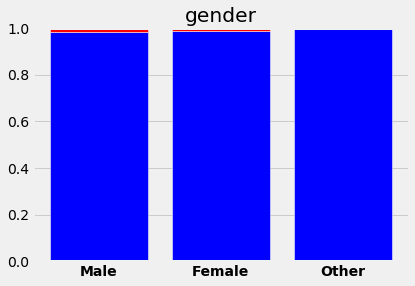

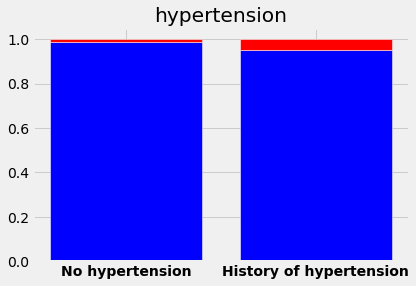

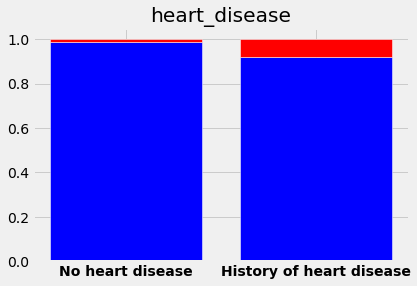

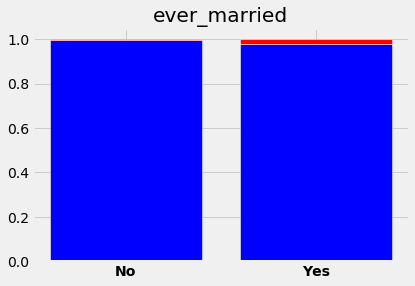

there's no case for at least one category 


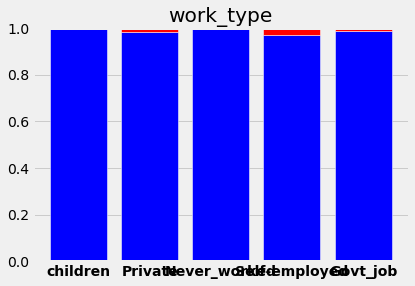

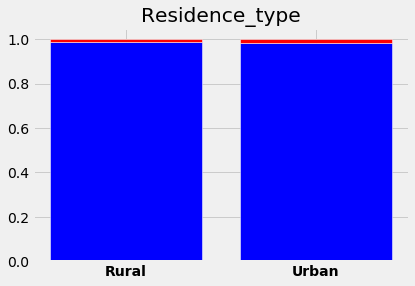

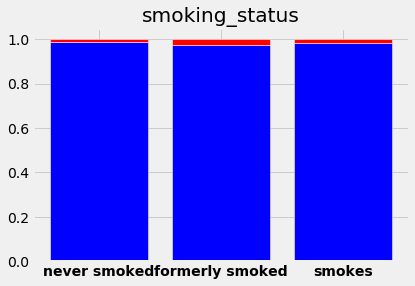

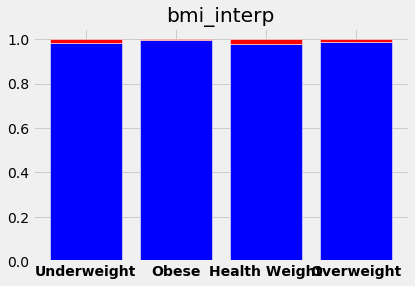

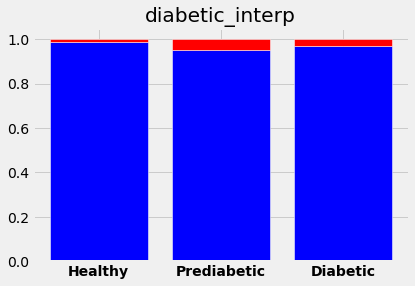

In [300]:
stacked_plot('gender')
stacked_plot('hypertension')
stacked_plot('heart_disease')
stacked_plot('ever_married')
stacked_plot('work_type')
stacked_plot('Residence_type')
stacked_plot('smoking_status')
stacked_plot('bmi_interp')
stacked_plot('diabetic_interp')

This plot grid allows us to quickly see how stroke rates differ depending on variable. Based on observation it appears `hypertension`, `heart_disease`, `marriage_status`, `work _type`, `bmi_interp`, and `diabetes_interp` all seem to have an effect on stroke and seem to be promising candidate variables. 

## Logistic Regression

Now lets analyze our predictor variables. Logistic regression is a mathematical model that estimates the probability of a binary outcomes. It is named after the logistic curve which takes the S-shape depicted below.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/640px-Logistic-curve.svg.png?1566122052688" alt="Logistic Curve" title="Logistic Curve" />

**Pre-Check:** What is our outcome? What information will a logistic regression model tell use about our outcome?

Our primary outcome is whether the individual had a stroke. The logistic regression model will allow us to see how individuals variables affect whether an individual has a stroke **while controlling for other variables in the model**. For instance, we can see whether being older affects having a stroke while controlling for diabetes, heart disease, etc...

Very useful indeed!

**Follow-Up:** What is statistical significance? What is a generally accepted level of statistical significance in healthcare research?

Statistical Significance can be defined as the chance that the relationship you observed in your data occurred by chance. What does this mean? Lets say our logistic regression model finds that gender has a statistically significant effect on having a stroke. This means that it is more likely that there is indeed a relationship between gender and stroke than chance would suggest. 

The conventional level of significance that is accepted is < 0.05 (this number is referred to as a p-value). This means that there is less than 5% chance that the observed relationship in the data was due to chance alone. The image below display a sample R output.

<img src="https://drchrispook.files.wordpress.com/2017/02/anova-output-from-r1.jpg" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

Lets create our logistic model

In [28]:
stroke_data.head()
stroke_data.loc[stroke_data['stroke']=='History of stroke','stroke'] = 1
stroke_data.loc[stroke_data['stroke']=='No stroke','stroke']=0

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_interp,diabetic_interp
0,30669,Male,3.0,No hypertension,No heart disease,No,children,Rural,95.12,18.0,never smoked,No stroke,Underweight,Healthy
1,30468,Male,58.0,History of hypertension,No heart disease,Yes,Private,Urban,87.96,39.2,never smoked,No stroke,Obese,Healthy
2,16523,Female,8.0,No hypertension,No heart disease,No,Private,Urban,110.89,17.6,never smoked,No stroke,Underweight,Healthy
3,56543,Female,70.0,No hypertension,No heart disease,Yes,Private,Rural,69.04,35.9,formerly smoked,No stroke,Obese,Healthy
4,46136,Male,14.0,No hypertension,No heart disease,No,Never_worked,Rural,161.28,19.1,never smoked,No stroke,Health Weight,Prediabetic


In [29]:
stroke_data_X=stroke_data.drop(columns=['id','stroke','bmi','avg_glucose_level'])
stroke_data_Y=stroke_data.stroke
stroke_data_X=pd.get_dummies(stroke_data_X)

In [30]:
stroke_data_X.head()

,age,gender_Female,gender_Male,gender_Other,hypertension_History of hypertension,hypertension_No hypertension,heart_disease_History of heart disease,heart_disease_No heart disease,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,bmi_interp_Underweight,bmi_interp_Health Weight,bmi_interp_Overweight,bmi_interp_Obese,diabetic_interp_Healthy,diabetic_interp_Prediabetic,diabetic_interp_Diabetic
0,3.0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0
1,58.0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0
2,8.0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0
3,70.0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0
4,14.0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0


In [31]:
stroke_data_Y.head()

0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: int64

In [32]:
# Split the training data and testing data
X_train, X_test, y_train, y_test = train_test_split(stroke_data_X, stroke_data_Y, test_size=0.3, random_state=100)

In [310]:
# Creating a logistic regression model
logisticRegr = LogisticRegression(C=0.025)
logisticRegr.fit(X_train,y_train)

/Users/IssacQI/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.025, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [311]:
score = logisticRegr.score(X_test, y_test)
print('the accuracy is:',score)

the accuracy is: 0.9854241338112306


In [312]:
logistic_pred=logisticRegr.predict(X_test)
confusion_matrix(y_test,logistic_pred)

array([[12372,     0],
       [  183,     0]])

We can see that several of our variables do not have a statistically significant effect. Several of these variables are clinically relevant. This includes while BMI and diabetes status. While there is no statistically significant effect, we know that obesity and diabetes are clinical risk factors for atherosclerotic diseases (one of the underlying etiologies of stroke). For this reason we will be keeping it in our model. 

While statistical significance is important, it is always more important to consider whether our predictor are clinically relevant for the outcome we will be predicting. In this case, many of the predictors in our model are clinically relevant for our outcome. For this reason we will be keeping them. Remember to alway consider the clinical significance of a variable and not just the statistical significance!

# Building a Prediction Model

**Pre-Check:** So far we haven't done any machine learning yet. What we've done can be considered traditional statistical analyses. What differentiates machine learning from traditional statistical analysis?

In machine learning, data is split into a training and test set. A machine learning model is then trainined on the training set to predict whatever outcome of interest it was designed to predict (in our case we're predicting whether the patient will have a stroke). The models predictive performance is then evaluated using the test set. 

<img src="https://www.sqlservercentral.com/wp-content/uploads/2019/05/Image-2.jpg" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

Today we will be using a model called a random forest. A random forest is an algorithm built from numerous smaller algorithm called decision trees. Decision trees are charts which help make a decision or prediction. Each branch represents a possible outcome. The end of branches represent an end result or decision. 

Decision trees are common in medical settings. For instance, below is an algorithm for evaluating febrile seizures. This is an example of a decision tree.

<img src="https://img.grepmed.com/uploads/1105/febrileseizure-management-algorithm-diagnosis-complex-original.png" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

In a random forest algorithm, the results of hundreds (and even thousands) of decision trees are calculated. These results are all combined. 

The rationale is that while a single decision tree can easily be wrong, the pooled result from numerous trees will be more accurate. 

Lets split our data into a training and test set now.

In [83]:
X_train, X_test, y_train, y_test = train_test_split(stroke_data_X, stroke_data_Y, test_size=0.3, random_state=4)

In [84]:
y_train.value_counts()
y_test.value_counts()
stroke_data.shape

0    28834
1      460
Name: stroke, dtype: int64

0    12372
1      183
Name: stroke, dtype: int64

(41849, 14)

Now lets fit our random forest model to the training and test data. We will then take a look at our models performance using a confusion matrix.

> If you're unsure what a confusion matrix is, please consult section 5.1.1 ('What is a Confusion Matrix')

In [295]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [297]:
# Set up the model
clf=RandomForestClassifier(n_estimators=500)

print('Training Random Forest, please be patient...\n')
clf.fit(X_train,y_train)

# Predict
print('Testing Random Forest, please be patient...\n')
y_pred=clf.predict(X_test)
                      
# Output results
print('Outputing results...')
conf_mat = confusion_matrix(y_test, y_pred)
print('confusion matrix')
print(conf_mat)
print(classification_report(y_test,y_pred))

Training Random Forest, please be patient...

Testing Random Forest, please be patient...

Outputing results...
confusion matrix
[[12332    40]
 [  179     4]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12372
           1       0.09      0.02      0.04       183

    accuracy                           0.98     12555
   macro avg       0.54      0.51      0.51     12555
weighted avg       0.97      0.98      0.98     12555



We see that our accuracy is over 90%. However, we did not correctly identify a single stroke. Would a model like this be useful? Absolutely not! All it could do is predict no strokes, the opposite of what we want!

This is one of the weaknesses of random forests. Since the data is very imbalanced (ie. there are tons of negative results and only a few positive results), we can still maintain over 90% accuracy and not predict a single stroke. The algorithm is biased towards outcomes which maximizes its accuracy. 

So what can we do? There are several approaches. We will be implementing a solution known as a weighted random forest. This will punish the algorithm more heavily for misclassifying the data. This is known as cost-sensitive learning. 

In [229]:
# Calculate the weight
no_stroke=stroke_data_Y.value_counts()[0]
print(no_stroke)
have_stroke=stroke_data_Y.value_counts()[1]
print(have_stroke)
total=stroke_data_Y.shape[0]
no_stroke_weight=total/(2*no_stroke)
have_stroke_weight=total/(2*have_stroke)

41206
643


In [299]:
# Set up the model
clf=RandomForestClassifier(n_estimators=500,class_weight='balanced')

print('Training Random Forest, please be patient...\n')
clf.fit(X_train,y_train)

# Predict
print('Testing Random Forest, please be patient...\n')
y_pred=clf.predict(X_test)
                      
# Output results
print('Outputing results...')
conf_mat = confusion_matrix(y_test, y_pred)
print('confusion matrix')
print(conf_mat)
print(classification_report(y_test,y_pred))

Training Random Forest, please be patient...

Testing Random Forest, please be patient...

Outputing results...
confusion matrix
[[12025   347]
 [  170    13]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     12372
           1       0.04      0.07      0.05       183

    accuracy                           0.96     12555
   macro avg       0.51      0.52      0.51     12555
weighted avg       0.97      0.96      0.97     12555



In [302]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
log_reg = LogisticRegression(C=4.0)
log_reg.fit(X_train,y_train)
#svm_model = svm.SVC(C=1,degree=1,kernel='linear')
#svm_model.fit(X_train,y_train)
#predicted_vals = svm_model.predict(X_test)
#confusion_matrix(y_test,predicted_vals)

/Users/IssacQI/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=4.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Much better! This illustrates why accuracy can be a misleading metric for machine learning models. So if accuracy is not a great measure, what is? Continue on to find out!

### What Is A Confusion Matrix

A confusion matrix is a 2x2 table which computes 4 different combinations of predicted vs. actual values. The combinations are True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)

<img src="https://miro.medium.com/max/320/1*Z54JgbS4DUwWSknhDCvNTQ.png" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

These 4 interpretations can be combined to generate many useful metrics. For our purpose there are three we will focus on. The first is accuracy: 

\[\large (TP + TN)/Total\]

Accuracy allows us to measure how often our model predicted correctly. The second metric is sensitivity:

\[\large TP / (TP + FN)\]

Sensitivity asks the question, that when our outcome is actually positive (ie. in our case when our patient is actually high-risk) how often will the model predict positively (ie. how often will the model then predict the patient to be high-risk). The final metric is specificity:

\[\large FP / (FP + TN)\]

Specificity asks the question, that when the outcome is actually negative (ie. in our case when our patient is actually low-risk) how often will the model predict negatively (ie. how often will the model then predict the patient to be low-risk). 




## Evaluating our Model

We will be evaluating our model using a receiver operating curve (ROC) and the area under the curve (AUC) value. 

> If you're unsure what a ROC or AUC value is, please consult section 5.1.1 ('Understanding ROC Curves and AUC Values')

(array([0.        , 0.02731975, 1.        ]),
 array([0.        , 0.07103825, 1.        ]),
 array([2, 1, 0]))

(0.0, 1.0)

(0.0, 1.0)

Text(0.5, 0, 'False Positive Rate or (1 - Specifity)')

Text(0, 0.5, 'True Positive Rate or (Sensitivity)')

Text(0.5, 1.0, 'Receiver Operating Characteristic')

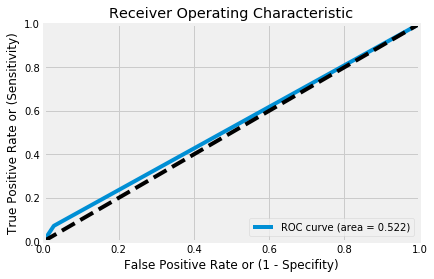

In [92]:
# plot a ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
roc_curve(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [94]:
# Calculate the area under the curve (AUC)
print('AUC:', roc_auc.round(2))

AUC: 0.52


The closer to the top left corner our ROC curve is the better. The higher our AUC value is the better. These metrics provide useful measure when tuning our model. They are also better overall measures than accuracy alone. 

### Understanding ROC Curves and AUC Values

An ROC plots sensitivity (probability of predicting a real psoitive will be positive) against 1-specificity (the probability of predicting a real negative will be a positive). A model with a 50-50 change of making a correct decision will have a ROC curve which is just a diagonal line. A model with a curve that hugs the top left corner is a perfect model. The area under a curve is a measure of magnitude of the ROC curve. The closer the ROC curve is to the top left corner, the higher the AUC value is. The higher the AUC value is, the better. 

<img src="https://miro.medium.com/max/406/1*pk05QGzoWhCgRiiFbz-oKQ.png" style="float: center; width: 34%; margin-bottom: 0.5em;">

## Explaining the Model

An important part of any model is being able to explain it. We will be measuring variable importance using a measure called a **Gini Score**. The mathematics of the **Gini Score** are beyond the scope of the case. For our model, the higher the decrease in gini score, the more important that variable is for our model's performance. 

In [99]:
X_train.shape.columns

(29294, 27)

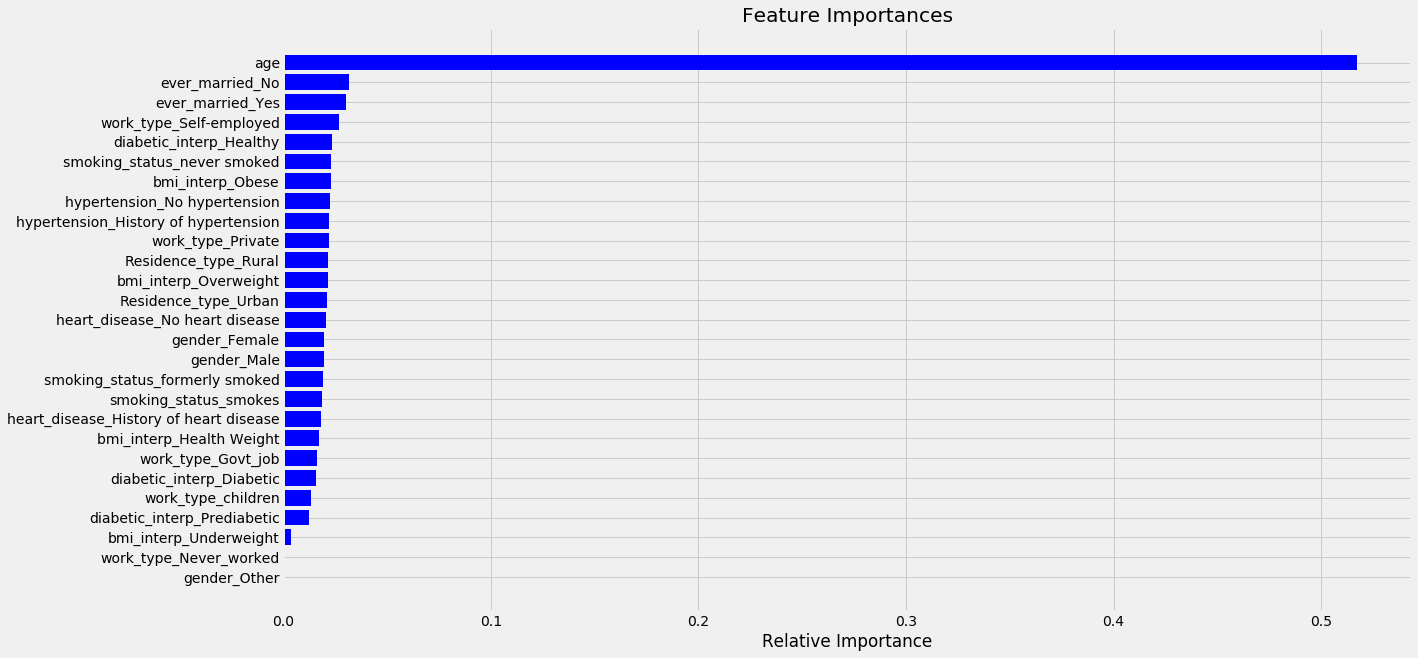

In [114]:
features=X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(18,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

From our model we can see that age is by far the most important variable for performance. Surprisingly we can see work type and marriage status are important variables as well. In fact, they are even more important than some of our traditional clinical variables! This doesn't necessarily mean being married will definitely lead to a stroke. This just indicate that these variables are important for our models performance. Regardless, this reveals non-traditional variables worth future investigation. 

Congratulations! You've reached the end of the case! This case provided just one example of how analytics and healthcare can be combined to solve clinical problems. I hope your curiosity has been piqued. There much more to learn and much more you can explore in this field!